# NETFLIX
---
0. NETFILX 소개
    - ....
1. 데이터 수집
    - Netflix_Data
    - Netflix_Original Data
    - Rating_Data
    - Netflix_Data + Netflix_Original Data + Rating_Data
2. 데이터 전처리
    - 결측치 수정 및 제거
    - Feature engineering
3. 데이터 EDA
    - Score, avg, total 먼저 비교 !! 
    
4. 결론

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')


## 0. NETFILX 소개

## 1. 데이터 수집
---


### Netflix_Data
</br>

__✅COLUMNS__
</br>

| SHOW_ID | 영화나 티비쇼의 고유번호  |
| --- | --- |
| TYPE | 영화인지 티비쇼인지 구별 |
| TITLE | 영화, 티비쇼의 제목 |
| DIRECTOR | 영화감독 |
| CAST | 영화, 쇼에 출연한 배우들 |
| COUNTRY | 영화나 쇼가 제작된 나라 |
| DATE_ADDED | 넷플릭스에 드라마나 영화가 방영된 날짜. 2008.01 ~ 2021.09.25 |
| RELEASE_YEAR | 실제 드라마나 영화가 방영된 연도. 1925 ~ 2021 |
| RATING | 영화/쇼의 시청 등급 |
| DURATION | 방영기간 |
| LISTED_IN | 장르 |
| DESCRIPTION | 줄거리 |



In [124]:
path = '../data'
Net_df = pd.read_csv(path+"/fixed_netflix_df.csv")
Net_df.head()

,show_id,type,director,title,cast,country,date_added,description,duration,listed_in,rating,release_year
0,s1,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,PG-13,2020
1,s2,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,2021
2,s3,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,2021
3,s4,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",TV-MA,2021
4,s5,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,2021


### Netflix_Original Data
__✅ COLUMNS__

In [125]:
OG = pd.read_csv("../data/NetflixOriginals.csv", encoding="ISO-8859-1")
OG = OG["Title"].tolist()
OG[:10]

['Enter the Anime',
 'Dark Forces',
 'The App',
 'The Open House',
 'Kaali Khuhi',
 'Drive',
 'Leyla Everlasting',
 'The Last Days of American Crime',
 'Paradox',
 'Sardar Ka Grandson']

### Rating_Data
__✅ COLUMNS__

In [126]:
Rating_df = pd.read_csv("../data/Netflix_Rating.csv")
Rating_df.head()

,Title,Avg,Total,Total_males,Total_Females,All_below_18,All_18_29,All_30_44,All_over_45,Males_below_18,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,Dick Johnson Is Dead,7.4,6241.0,3780.0,592.0,12.0,1050.0,2321.0,817.0,10.0,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,Blood & Water,6.7,2952.0,603.0,867.0,10.0,416.0,644.0,281.0,4.0,...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,Ganglands,7.0,2349.0,1297.0,117.0,1.0,99.0,574.0,648.0,1.0,...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,Jailbirds New Orleans,6.7,194.0,57.0,60.0,0.0,19.0,63.0,30.0,0.0,...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,Kota Factory,9.3,66527.0,19278.0,984.0,144.0,10004.0,5687.0,340.0,134.0,...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


### Netflix_Data + Netflix_Original Data +  Rating_Data

In [127]:
# Netflix_Data + Netflix_Original Data 
og = []
for name in Net_df.title.values:
    if name in OG:
        og.append(1)
    else:
        og.append(0)

Net_df["Original"] = og
Net_df["Original"].value_counts()

0    8301
1     506
Name: Original, dtype: int64

In [128]:
df = pd.merge(Net_df, Rating_df, left_on= "title", right_on= "Title")
df.head()

,show_id,type,director,title,cast,country,date_added,description,duration,listed_in,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,s1,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,s2,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,s3,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,s4,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,s5,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


## 2. 데이터 전처리

- 결측치 수정 및 제거
    - 결측치 확인 및 크롤링으로 추가
    - 확인되지 않는 행 제거
    - 사용하지 않는 컬럼 제거
- Feature engineering
    - 영화 관람 등급, 티비 관람 등급
    - score(평점, 리뷰 수)...
        

### 결측치 수정 및 제거

In [129]:
# 밀린 데이터 채우고, 없는 데이터 제거
df[df['rating'] == '74 min']

df[df['rating'] == '66 min']

df[df['rating'] == '84 min']

index = df[df['rating'] == '66 min'].index 
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '74 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '84 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

df['rating'].unique()

df.isnull().sum()

show_id                   0
type                      0
director                  0
title                     0
cast                      0
country                   0
date_added               10
description               0
duration                  0
listed_in                 0
rating                    7
release_year              0
Original                  0
Title                     0
Avg                       0
Total                     0
Total_males               0
Total_Females             0
All_below_18              0
All_18_29                 0
All_30_44                 0
All_over_45               0
Males_below_18            0
Males_18_29               0
Males_30_44               0
Males_over_45             0
Females_below_18          0
Females_18_29             0
Females_30_44             0
Females_over_45           0
Title_ID                  0
All_rank_below_18         0
All_rank_18_29            0
All_rank_30_44            0
All_rank_over_45          0
Males_rank_below_18 

In [130]:
# NOT FOUND 제거
df.drop(df[df["Title_ID"] == "NOT FOUND"].index, inplace=True)
df = df.reset_index(drop=True)

In [131]:
#NO RATINGS
df.drop(df[df["Avg"] == 0].index, inplace=True)
df.reset_index(drop=True)

,show_id,type,director,title,cast,country,date_added,description,duration,listed_in,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,s1,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,s2,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,s3,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,s4,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,s5,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,s8803,Movie,David Fincher,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019","A political cartoonist, a crime reporter and a...",158 min,"Cult Movies, Dramas, Thrillers",...,8.2,7.9,7.7,7.5,7.6,7.7,7.4,7.5,7.7,7.5
8426,s8804,TV Show,Jiyeon Park,Zombie Dumb,NONE,Production Company Project Page,"July 1, 2019","While living alone in a spooky town, a young g...",2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",...,0.0,3.5,8.0,0.0,0.0,0.0,0.0,10.0,5.0,10.0
8427,s8805,Movie,Ruben Fleischer,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",Looking to survive in a world taken over by zo...,88 min,"Comedies, Horror Movies",...,7.7,7.7,7.6,7.4,7.2,7.6,7.6,7.6,7.6,7.6
8428,s8806,Movie,Peter Hewitt,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020","Dragged from civilian life, a former superhero...",88 min,"Children & Family Movies, Comedies",...,3.1,4.0,3.9,4.6,0.0,5.2,4.9,5.5,4.2,5.2


In [132]:
# 없는 rating data 제거 , 8807 - 202 - 10(중복있을듯 아마...) = 8598
df.drop(df[df["rating"].isnull()].index, inplace=True)
df = df.reset_index(drop=True)

In [133]:
df.drop(df[df["date_added"].isnull()].index, inplace=True)
df = df.reset_index(drop=True)

In [134]:
# 사용하지 않는 컬럼 제거
# date_added
# show_id
# desciption
# Title_ID

df.drop(["show_id", "Title_ID"], axis = 1, inplace=True)
df.head()

,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,Movie,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,PG-13,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,TV Show,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,TV Show,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,TV Show,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",TV-MA,...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,TV Show,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


In [135]:
# 최종 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   8413 non-null   object 
 1   director               8413 non-null   object 
 2   title                  8413 non-null   object 
 3   cast                   8413 non-null   object 
 4   country                8413 non-null   object 
 5   date_added             8413 non-null   object 
 6   description            8413 non-null   object 
 7   duration               8413 non-null   object 
 8   listed_in              8413 non-null   object 
 9   rating                 8413 non-null   object 
 10  release_year           8413 non-null   int64  
 11  Original               8413 non-null   int64  
 12  Title                  8413 non-null   object 
 13  Avg                    8413 non-null   float64
 14  Total                  8413 non-null   float64
 15  Tota

### Feature engineering

type columns
- 영화: 0
- 티비쇼: 1

In [136]:
def type_col(col):
    if col == 'Movie':
        return 0
    else:
        return 1
    

In [137]:
df['type'] = df["type"].apply(type_col)
df.head()

,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_below_18,Males_rank_18_29,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females
0,0,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,PG-13,...,7.9,7.7,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5
1,1,Nosipho Dumisa,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021","After crossing paths at a party, a Cape Town t...",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,...,5.5,6.6,5.9,4.9,5.0,6.9,7.0,7.0,5.9,7.0
2,1,Julien Leclercq,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",To protect his family from a powerful drug lor...,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,...,6.0,6.9,6.8,7.0,0.0,5.8,6.9,7.0,6.9,7.0
3,1,Jacquelyn C. Migdal,Jailbirds New Orleans,NONE,United States,"September 24, 2021","Feuds, flirtations and toilet talk go down amo...",1 Season,"Docuseries, Reality TV",TV-MA,...,0.0,6.4,6.3,6.6,0.0,6.2,6.9,6.9,6.5,6.9
4,1,Raghav Subbu,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",In a city of coaching centers known to train I...,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,...,9.6,9.2,8.5,6.4,4.3,9.2,7.5,5.7,9.0,8.5


rating col
- 전체관람가('G', 'PG', 'TV-Y', 'TV-7', 'TV-Y7-FV', 'TV-G'): 0
- 12,15세 관람가('PG-13', 'TV-PG', 'TV-14'): 1
- 15, 청불('R', 'NC-17', 'NR', 'UR', 'TV-MA'): 2 

In [138]:
def rating_col(col):
    if col in ['G', 'PG', 'TV-Y','TV-Y7', 'TV-Y7-FV', 'TV-G']:
        return 0
    elif col in ['PG-13', 'TV-PG', 'TV-14']:
        return 1
    elif col in ['R', 'NC-17', 'NR', 'UR', 'TV-MA']:
        return 2
    else:
        return col

In [139]:
df['rating'] = df["rating"].apply(rating_col)
df['rating']

0       1
1       2
2       2
3       2
4       2
       ..
8408    2
8409    0
8410    2
8411    0
8412    1
Name: rating, Length: 8413, dtype: int64

### Score : 평점 * 리뷰 수

In [140]:
df["Score"] = df["Avg"] * df["Total"] 
df["Score_normal"] = (df["Score"] - df["Score"].mean())/df["Score"].std() + 1 #정규화

In [141]:
# min 열만 가져오기
duration_col = df['duration'].str.endswith('min')

In [142]:
mins_duration = df[duration_col]
mins_duration.head()

,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_30_44,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females,Score,Score_normal
0,0,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,1,...,7.4,7.1,8.0,7.8,7.4,7.3,7.4,7.5,46183.4,0.788137
6,0,"Robert Cullen, José Luis Ucha",My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",Equestria's divided. But a bright-eyed hero be...,91 min,Children & Family Movies,0,...,6.5,5.4,5.9,7.2,7.5,7.6,6.4,7.4,22590.6,0.761540
7,0,Haile Gerima,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021","On a photo shoot in Ghana, an American model s...",125 min,"Dramas, Independent Movies, International Movies",2,...,6.7,6.8,0.0,6.6,7.9,8.1,6.8,7.8,4634.0,0.741297
9,0,Theodore Melfi,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",A woman adjusting to life after a loss contend...,104 min,"Comedies, Dramas",1,...,5.9,6.2,6.0,6.4,6.5,7.2,6.0,6.7,73161.9,0.818551
12,0,Christian Schwochow,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",After most of her family is murdered in a terr...,127 min,"Dramas, International Movies",2,...,5.3,5.2,0.0,5.8,6.1,5.8,5.3,6.0,4260.6,0.740876


In [143]:
m = []
for x,_ in df[duration_col]["duration"].str.split(" "):
    m.append(int(x))
    

In [144]:
mins_duration["duration_int"] = m
mins_duration.head()


,type,director,title,cast,country,date_added,description,duration,listed_in,rating,...,Males_rank_over_45,Females_rank_below_18,Females_rank_18_29,Females_rank_30_44,Females_rank_over_45,Avg_rank_males,Avg_rank_Females,Score,Score_normal,duration_int
0,0,Kirsten Johnson,Dick Johnson Is Dead,"Michael Hilow, Dick Johnson, Chad Knorr, Vasth...",United States,"September 25, 2021","As her father nears the end of his life, filmm...",90 min,Documentaries,1,...,7.1,8.0,7.8,7.4,7.3,7.4,7.5,46183.4,0.788137,90
6,0,"Robert Cullen, José Luis Ucha",My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",Equestria's divided. But a bright-eyed hero be...,91 min,Children & Family Movies,0,...,5.4,5.9,7.2,7.5,7.6,6.4,7.4,22590.6,0.761540,91
7,0,Haile Gerima,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021","On a photo shoot in Ghana, an American model s...",125 min,"Dramas, Independent Movies, International Movies",2,...,6.8,0.0,6.6,7.9,8.1,6.8,7.8,4634.0,0.741297,125
9,0,Theodore Melfi,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",A woman adjusting to life after a loss contend...,104 min,"Comedies, Dramas",1,...,6.2,6.0,6.4,6.5,7.2,6.0,6.7,73161.9,0.818551,104
12,0,Christian Schwochow,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",After most of her family is murdered in a terr...,127 min,"Dramas, International Movies",2,...,5.2,0.0,5.8,6.1,5.8,5.3,6.0,4260.6,0.740876,127


In [145]:
print("min :" , sorted(m)[0])
print("max :", sorted(m)[-1])

min : 3
max : 312


In [146]:
bins = [0,30,50,70,90,110,130,150,320]
dic_label = {1:"0-29", 2:"30-49", 
            3:"50-69", 4:"70-89",
            5:"60-109", 6:"110-129",
            7:"130-149", 8:"150-"}

# label = [1,2,3,4,5,6,7,8]

mins_duration["duration_cate"] = pd.cut(mins_duration["duration_int"], bins = bins, labels = dic_label.values())
mins_duration["duration_cate"].value_counts()

60-109     2296
70-89      1192
110-129    1073
130-149     445
50-69       417
150-        228
30-49       138
0-29        110
Name: duration_cate, dtype: int64

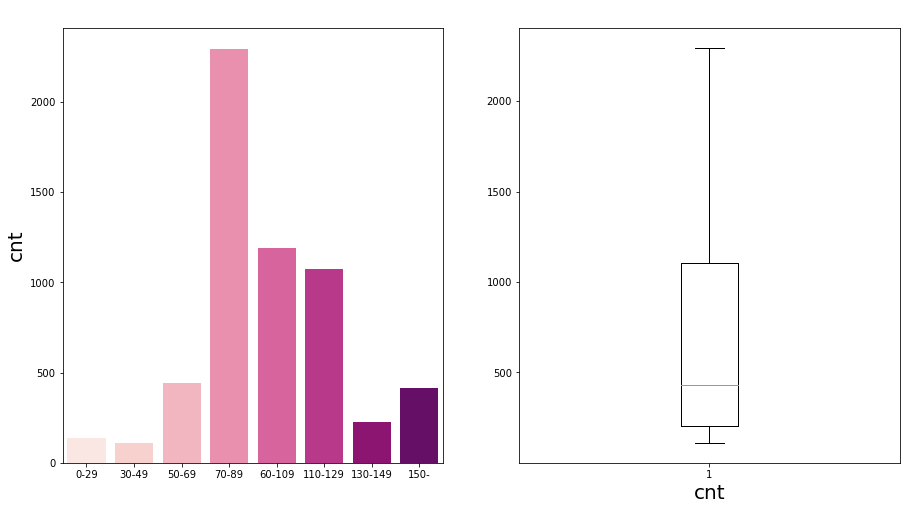

In [147]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.barplot(x = mins_duration["duration_cate"].unique(), y = mins_duration["duration_cate"].value_counts(), palette = 'RdPu' )
# plt.plot(x,y, color = "forestgreen", marker = 'o', linewidth = 2)
plt.ylabel("cnt", fontsize = 20 )
plt.xticks(fontsize = 10)
plt.title("Duration(min) Barplot", fontsize = 20, color = "white")

plt.subplot(122)
plt.boxplot(x = mins_duration["duration_cate"].value_counts())
plt.xlabel("cnt", fontsize = 20 )
plt.title("Duration(min) Boxplot", fontsize = 20, color = "white")
plt.xticks(fontsize = 10)

plt.show()

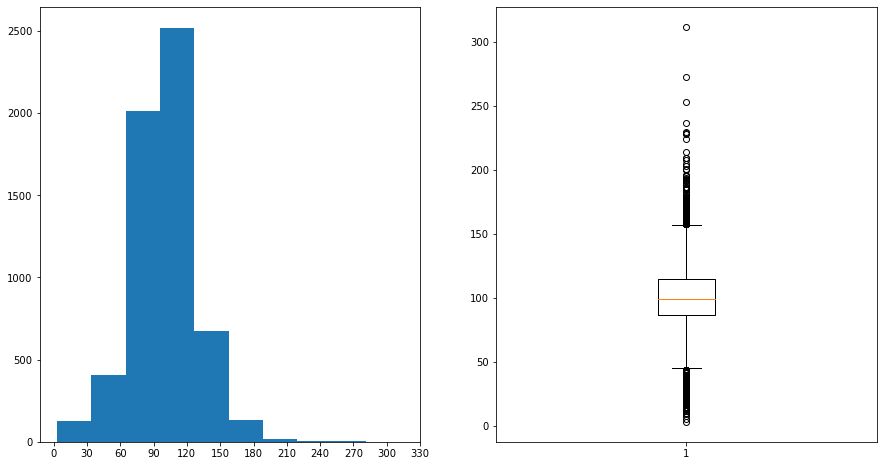

In [148]:
plt.figure(figsize=(15,8))
aa =df.loc[df['duration'].str.endswith('min'),'duration'] 
aa = [int(x[:-4]) for x in aa] 

plt.subplot(121)
plt.hist(aa)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330]) 

plt.subplot(122)
plt.boxplot(aa)
plt.show()

In [149]:
# listed_in columns을 중복제거 후 ','로 split해서 딕셔너리에 저장
# 장르별 duration 확인
listin = df['listed_in'].dropna().unique()

listin_list = []
for x in listin:
    list_1 = x.split(',')
    for y in list_1:
        if y.strip() in listin_list:
            continue
        else:
            listin_list.append(y.strip())
listin_list
df['listed_in']  = df['listed_in'].apply(lambda x: x.split(','))

bb = {x:[] for x in listin_list}
for x in range(len(df)):
   for y in df['listed_in'][x]:
       bb[y.strip()].append(df['duration'][x])

In [150]:
bb

{'Documentaries': ['90 min',
  '67 min',
  '23 min',
  '113 min',
  '96 min',
  '92 min',
  '97 min',
  '80 min',
  '94 min',
  '89 min',
  '83 min',
  '86 min',
  '93 min',
  '86 min',
  '82 min',
  '70 min',
  '86 min',
  '78 min',
  '90 min',
  '70 min',
  '69 min',
  '97 min',
  '102 min',
  '97 min',
  '114 min',
  '81 min',
  '85 min',
  '100 min',
  '93 min',
  '96 min',
  '100 min',
  '93 min',
  '93 min',
  '39 min',
  '83 min',
  '97 min',
  '89 min',
  '89 min',
  '104 min',
  '273 min',
  '84 min',
  '82 min',
  '97 min',
  '36 min',
  '61 min',
  '74 min',
  '58 min',
  '72 min',
  '99 min',
  '109 min',
  '73 min',
  '91 min',
  '87 min',
  '101 min',
  '85 min',
  '97 min',
  '109 min',
  '95 min',
  '58 min',
  '76 min',
  '141 min',
  '65 min',
  '75 min',
  '84 min',
  '55 min',
  '86 min',
  '75 min',
  '83 min',
  '98 min',
  '93 min',
  '21 min',
  '87 min',
  '90 min',
  '87 min',
  '101 min',
  '98 min',
  '42 min',
  '90 min',
  '109 min',
  '76 min',
  '92 min'

In [151]:
# season, min 혼용된 listed_in 확인 
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) != any([x.endswith('min') for x in bb[i]]):
        print(i)

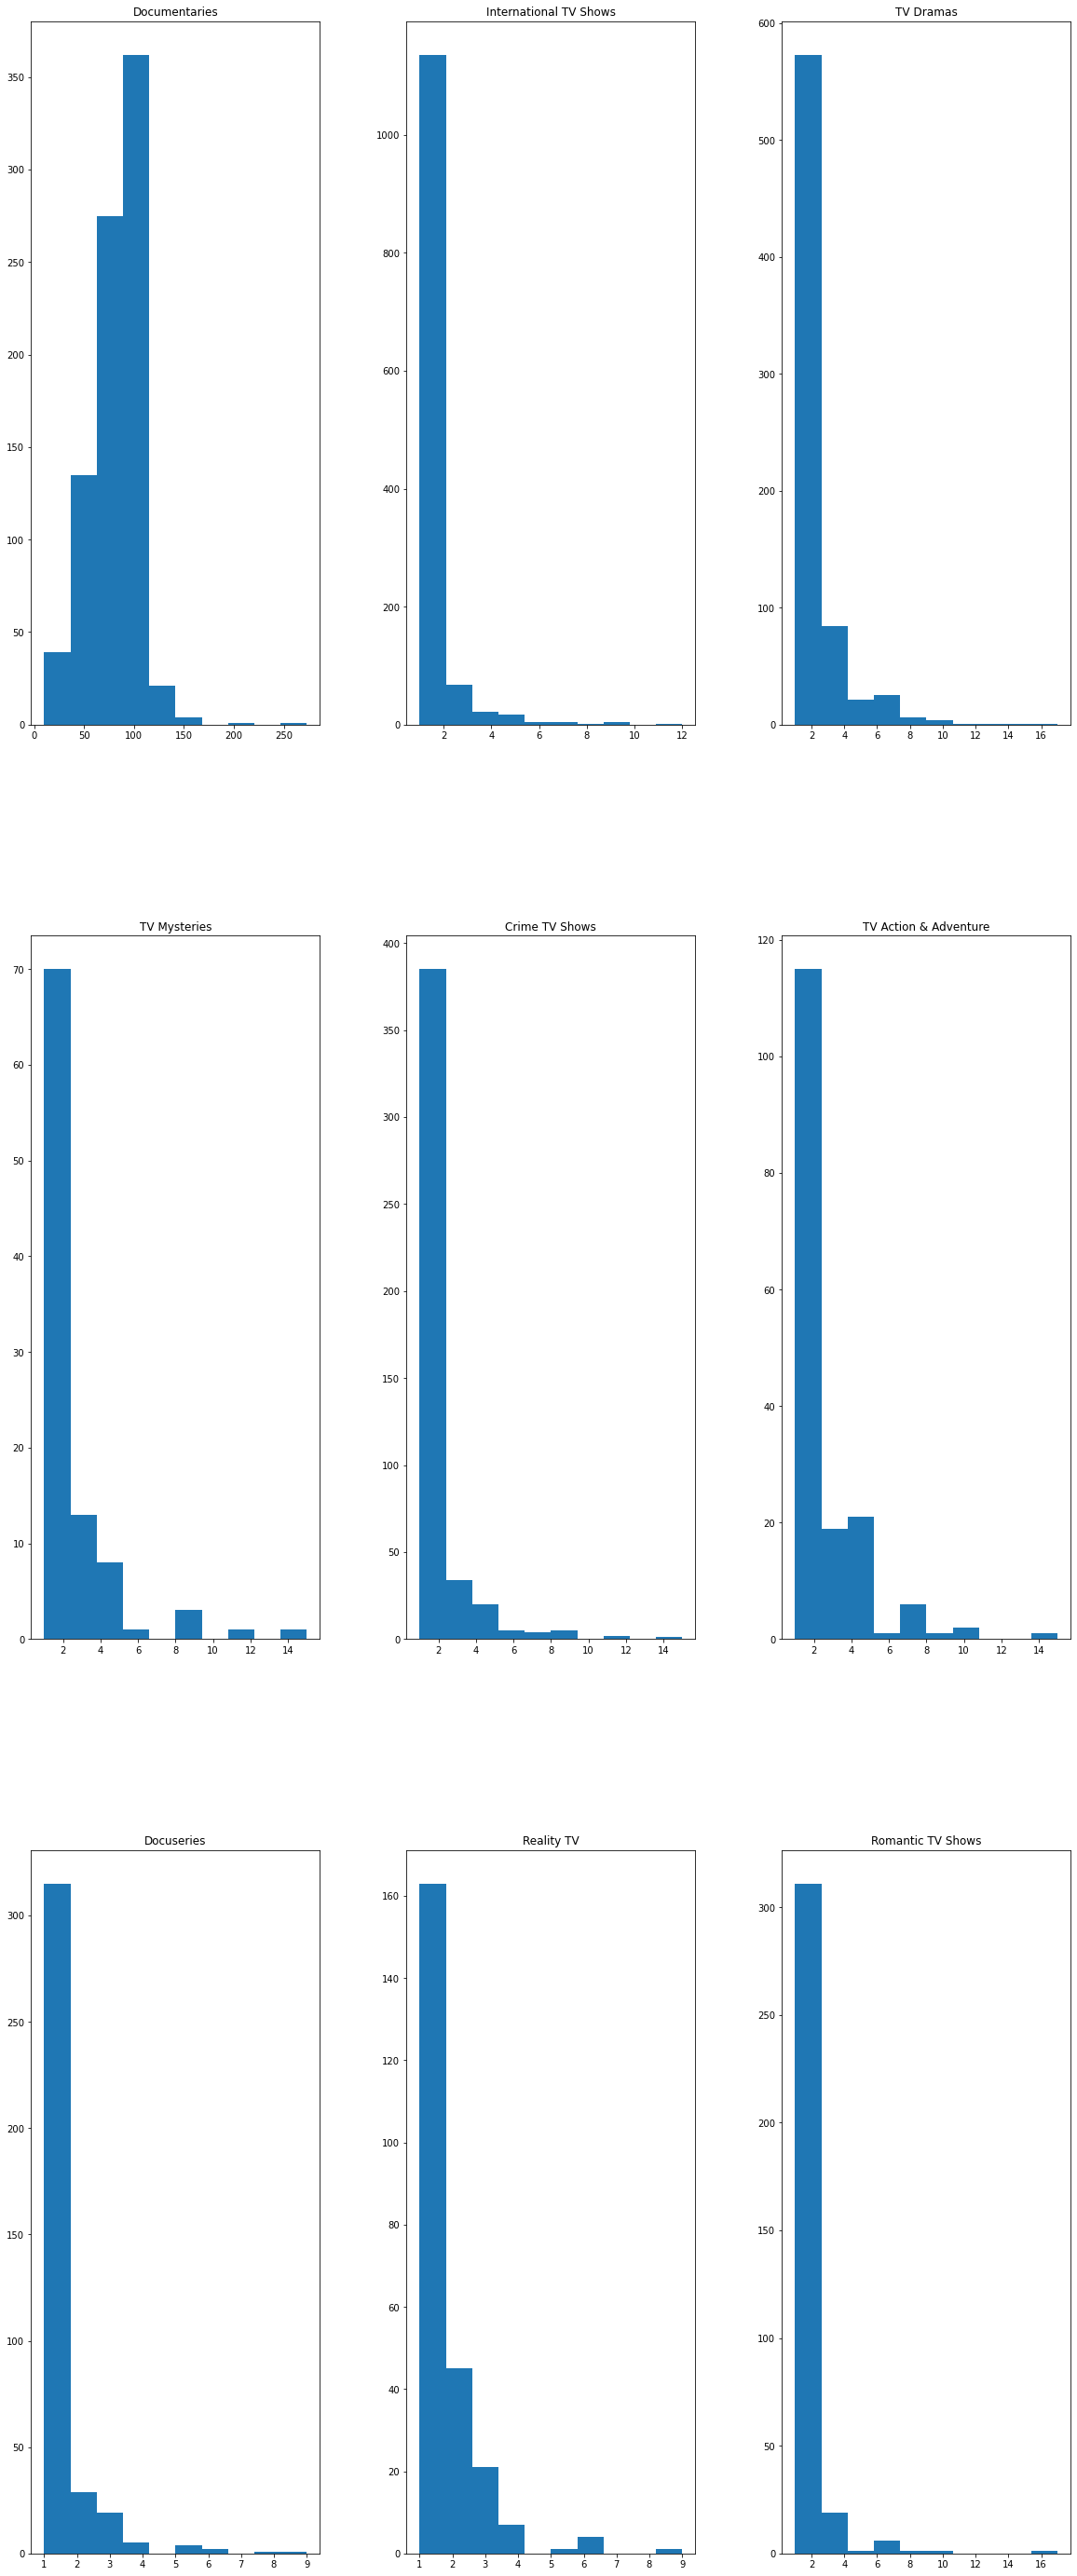

In [152]:
count=0
min_gen=[]
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) == True:
        count+=1
        min_gen.append(i)


fig,ax = plt.subplots(3,3,figsize =(20,50))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.3)

len(bb)
j=0
for i in bb:
    if j==9:break
    hist_data = [int(x.split(' ')[0]) for x in bb[i]]
    ax[j//3,j%3].hist(hist_data)
    ax[j//3,j%3].set_title(i)

    j+=1

___

### 개별 EDA

### diretor, score

In [155]:
direc_score = df[['director', 'Score', 'Score_normal']]
direc_score

,director,Score,Score_normal
0,Kirsten Johnson,46183.4,0.788137
1,Nosipho Dumisa,19778.4,0.758370
2,Julien Leclercq,16443.0,0.754610
3,Jacquelyn C. Migdal,1299.8,0.737538
4,Raghav Subbu,618701.1,1.433562
...,...,...,...
8408,David Fincher,3977604.4,5.220205
8409,Jiyeon Park,110.0,0.736197
8410,Ruben Fleischer,4222932.4,5.496774
8411,Peter Hewitt,89547.5,0.837024


In [156]:
direc_score['cnt'] = 1
direc_score

,director,Score,Score_normal,cnt
0,Kirsten Johnson,46183.4,0.788137,1
1,Nosipho Dumisa,19778.4,0.758370,1
2,Julien Leclercq,16443.0,0.754610,1
3,Jacquelyn C. Migdal,1299.8,0.737538,1
4,Raghav Subbu,618701.1,1.433562,1
...,...,...,...,...
8408,David Fincher,3977604.4,5.220205,1
8409,Jiyeon Park,110.0,0.736197,1
8410,Ruben Fleischer,4222932.4,5.496774,1
8411,Peter Hewitt,89547.5,0.837024,1


In [157]:
group = direc_score[['Score', 'Score_normal', 'cnt']].groupby(direc_score['director'])

In [158]:
group_score = group.sum().sort_values(by='Score', ascending=False)
group_score

,Score,Score_normal,cnt
director,,,
Quentin Tarantino,63131250.6,76.323201,7
Steven Spielberg,52623937.1,68.158199,12
Martin Scorsese,43049065.8,58.100089,13
David Fincher,33821344.2,44.016901,8
Peter Jackson,30943657.2,37.092392,3
...,...,...,...
Keiji Inai,37.0,0.736114,1
Liung Man Chong,32.4,0.736109,1
Aatmaram Dharne,32.0,0.736109,1


In [159]:
group_score['Score/cnt'] = group_score['Score']//group_score['cnt']
group_score.sort_values(by='Score/cnt', ascending=False)

,Score,Score_normal,cnt,Score/cnt
director,,,,
Christopher Nolan,19745140.8,22.995656,1,19745140.0
Danny Cannon,13663809.6,16.139898,1,13663809.0
Peter Jackson,30943657.2,37.092392,3,10314552.0
Tony Kaye,9254647.0,11.169252,1,9254647.0
Quentin Tarantino,63131250.6,76.323201,7,9018750.0
...,...,...,...,...
Keiji Inai,37.0,0.736114,1,37.0
Liung Man Chong,32.4,0.736109,1,32.0
Aatmaram Dharne,32.0,0.736109,1,32.0


In [160]:
top_100_score_direc = group_score.sort_values(by='Score/cnt', ascending=False).head(100)
top_100_score_direc

,Score,Score_normal,cnt,Score/cnt
director,,,,
Christopher Nolan,19745140.8,22.995656,1,19745140.0
Danny Cannon,13663809.6,16.139898,1,13663809.0
Peter Jackson,30943657.2,37.092392,3,10314552.0
Tony Kaye,9254647.0,11.169252,1,9254647.0
Quentin Tarantino,63131250.6,76.323201,7,9018750.0
...,...,...,...,...
Alejandro G. Iñárritu,2243377.5,3.265133,1,2243377.0
Guillermo del Toro,6728343.7,9.793382,3,2242781.0
Denis Villeneuve,4452621.9,6.491786,2,2226310.0


<AxesSubplot:xlabel='Score/cnt', ylabel='Density'>

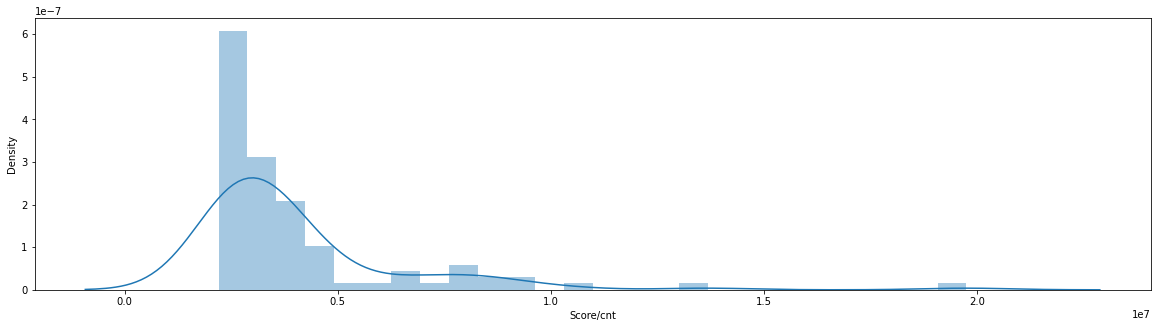

In [161]:
plt.figure(figsize = (20, 5))
sns.distplot(top_100_score_direc['Score/cnt'])

#### 결과
top 5 감독
- Christopher Nolan
- Danny Cannon
- Peter Jackson
- Tony Kaye
- Quentin Tarantino

___

### 워드클라우드

In [162]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [163]:
def text2wordcloud(text):
    spwords = set(STOPWORDS)
    wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='font.otf',
                background_color='white', width=800, height=800)
    
    
    wc1.generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wc1)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()


#### release_year와 date_added의 차이가 별로 안나는 것들 (5 year)

In [188]:
def wordcloud_datedif_5():
    df["date_added_year"] = df["date_added"].apply(lambda x:x.split(", ")[1])
    df["diff"] = df["date_added_year"].astype(int) - df["release_year"] 
    
    df_diff_5 = df[df["diff"] >= 5] 
    
    date_release_5 = df_diff_5[['description', 'date_added']]
    
    date_release_5['date_added'] = date_release_5['date_added'].apply(lambda x: int(x.split(',')[1]))
    date_release_5 = date_release_5[date_release_5['date_added'] >= 2015]
    group = date_release_5[['description']].groupby(date_release_5['date_added']).sum()
    
    group['description'].apply(text2wordcloud)

In [197]:
# wordcloud_datedif_5()

___

#### 넷플릭스 오리지널

In [189]:
def wordcloud_origin():
    date_origin = df[['description', 'date_added', 'Original']]
    
    date_origin = date_origin[date_origin['Original'] == 1]
    
    date_origin['date_added'] = date_origin['date_added'].apply(lambda x: int(x.split(',')[1]))
    date_origin = date_origin[date_origin['date_added'] >= 2015]
    group = date_origin[['description']].groupby(date_origin['date_added']).sum()
   
    group['description'].apply(text2wordcloud)

In [193]:
# wordcloud_origin()